#Dependencies & Loading Dataset

In [46]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [39]:
# mount Gdrive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Load dataset  (from GDrive)
net_mig_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Shared/DE/Project_10June/net_mig_clean.csv')


net_mig_clean.head(10)

,Unnamed: 0,index,country,city,climate_index,cost_of_living_index,health_care_index,pollution_index,property_price_to_income_ratio,purchasing_power_index,safety_index,traffic_commute_time_index,quality_of_life_index,Net_Migration
0,0,1380.0,Germany,Aachen,87.19,63.22,80.91,34.97,11.15,125.89,66.50,23.55,192.47,19.947475
1,1,1266.0,Denmark,Aalborg,81.94,75.90,75.88,13.73,6.23,115.07,74.70,24.62,205.76,28.794709
2,2,227.0,Denmark,Aarhus-Denmark,81.20,75.19,79.28,26.63,7.17,124.33,78.31,29.58,200.43,31.316867
3,3,2310.0,United Kingdom,Aberdeen,82.55,64.27,80.29,27.14,3.60,156.27,63.38,31.50,209.97,22.363512
4,4,860.0,United Arab Emirates,Abu-Dhabi,43.89,54.91,72.00,45.48,5.78,152.81,88.17,29.86,192.11,36.057917
5,5,598.0,Nigeria,Abuja,79.42,29.60,60.96,57.70,18.60,11.30,41.64,50.25,53.40,-12.919567
6,6,344.0,Ghana,Accra,67.03,32.28,57.11,90.08,343.79,16.28,55.43,52.50,0.00,-43.686770
7,7,2240.0,Turkey,Adana,88.99,32.48,79.97,38.66,6.90,72.59,44.10,27.89,162.87,-8.405148
8,8,2056.0,Saudi Arabia,Ad-Dammam,27.34,45.93,60.18,56.05,2.57,137.28,70.30,27.95,164.74,14.696448
9,9,270.0,Ethiopia,Addis-Ababa,96.82,49.88,53.79,74.58,54.24,10.15,50.72,70.62,38.94,-27.624373


In [52]:
# Load dataset  (from GitHub)

import pandas as pd

url = "https://raw.githubusercontent.com/ronmaccms/DE_Team/main/new_scraping_scripts/net_mig_clean.csv"

net_mig_clean = pd.read_csv(url)

net_mig_clean.head(10)

,index,country,city,climate_index,cost_of_living_index,health_care_index,pollution_index,property_price_to_income_ratio,purchasing_power_index,safety_index,traffic_commute_time_index,quality_of_life_index,Net_Migration
0,1380,Germany,Aachen,87.19,63.22,80.91,34.97,11.15,125.89,66.50,23.55,192.47,19.947475
1,1266,Denmark,Aalborg,81.94,75.90,75.88,13.73,6.23,115.07,74.70,24.62,205.76,28.794709
2,227,Denmark,Aarhus-Denmark,81.20,75.19,79.28,26.63,7.17,124.33,78.31,29.58,200.43,31.316867
3,2310,United Kingdom,Aberdeen,82.55,64.27,80.29,27.14,3.60,156.27,63.38,31.50,209.97,22.363512
4,860,United Arab Emirates,Abu-Dhabi,43.89,54.91,72.00,45.48,5.78,152.81,88.17,29.86,192.11,36.057917
5,598,Nigeria,Abuja,79.42,NaN,60.96,57.70,NaN,NaN,41.64,50.25,NaN,-12.919567
6,344,Ghana,Accra,67.03,32.28,57.11,90.08,343.79,16.28,55.43,52.50,0.00,-43.686770
7,2240,Turkey,Adana,88.99,32.48,79.97,38.66,6.90,72.59,44.10,27.89,162.87,-8.405148
8,2056,Saudi Arabia,Ad-Dammam,27.34,45.93,60.18,56.05,2.57,137.28,70.30,27.95,164.74,14.696448
9,270,Ethiopia,Addis-Ababa,96.82,49.88,53.79,74.58,54.24,10.15,50.72,70.62,38.94,-27.624373


#Prepare Dataset

In [13]:
# drop the columns 'climate_index' and 'property_price_to_income_ratio' and rename it as net_mig_clean_d

net_mig_clean_d = net_mig_clean.drop(columns=['climate_index', 'property_price_to_income_ratio'])

net_mig_clean_d.head(10)

,Unnamed: 0,index,country,city,cost_of_living_index,health_care_index,pollution_index,purchasing_power_index,safety_index,traffic_commute_time_index,quality_of_life_index,Net_Migration
0,0,1380.0,Germany,Aachen,63.22,80.91,34.97,125.89,66.50,23.55,192.47,19.947475
1,1,1266.0,Denmark,Aalborg,75.90,75.88,13.73,115.07,74.70,24.62,205.76,28.794709
2,2,227.0,Denmark,Aarhus-Denmark,75.19,79.28,26.63,124.33,78.31,29.58,200.43,31.316867
3,3,2310.0,United Kingdom,Aberdeen,64.27,80.29,27.14,156.27,63.38,31.50,209.97,22.363512
4,4,860.0,United Arab Emirates,Abu-Dhabi,54.91,72.00,45.48,152.81,88.17,29.86,192.11,36.057917
5,5,598.0,Nigeria,Abuja,29.60,60.96,57.70,11.30,41.64,50.25,53.40,-12.919567
6,6,344.0,Ghana,Accra,32.28,57.11,90.08,16.28,55.43,52.50,0.00,-43.686770
7,7,2240.0,Turkey,Adana,32.48,79.97,38.66,72.59,44.10,27.89,162.87,-8.405148
8,8,2056.0,Saudi Arabia,Ad-Dammam,45.93,60.18,56.05,137.28,70.30,27.95,164.74,14.696448
9,9,270.0,Ethiopia,Addis-Ababa,49.88,53.79,74.58,10.15,50.72,70.62,38.94,-27.624373


In [56]:
#drop the first 4 columns (Non-Numeric Columns)

net_mig_clean_n = net_mig_clean_d.iloc[:, 4:]

net_mig_clean_n.head(10)


,cost_of_living_index,health_care_index,pollution_index,purchasing_power_index,safety_index,traffic_commute_time_index,quality_of_life_index,Net_Migration
0,63.22,80.91,34.97,125.89,66.50,23.55,192.47,19.947475
1,75.90,75.88,13.73,115.07,74.70,24.62,205.76,28.794709
2,75.19,79.28,26.63,124.33,78.31,29.58,200.43,31.316867
3,64.27,80.29,27.14,156.27,63.38,31.50,209.97,22.363512
4,54.91,72.00,45.48,152.81,88.17,29.86,192.11,36.057917
5,29.60,60.96,57.70,11.30,41.64,50.25,53.40,-12.919567
6,32.28,57.11,90.08,16.28,55.43,52.50,0.00,-43.686770
7,32.48,79.97,38.66,72.59,44.10,27.89,162.87,-8.405148
8,45.93,60.18,56.05,137.28,70.30,27.95,164.74,14.696448
9,49.88,53.79,74.58,10.15,50.72,70.62,38.94,-27.624373


In [ ]:
# OPTIONAL  A different way to convert to Numerical data

# Convert all non-numerical columns to numerical using one-hot encoding
net_mig_clean_nn = pd.get_dummies(net_mig_clean_n)

# Print the first 10 rows of the transformed dataset
net_mig_clean_nn.head(10)


#XGBoost

##Split and Convert Data

In [20]:
# Split the dataset
X = net_mig_clean_n.drop('Net_Migration', axis=1)
y = net_mig_clean_n['Net_Migration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



##Model & Parameters

###Parameters Tuning Process

In [22]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [23]:
# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

In [27]:
# Set up Grid Search
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

In [28]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [29]:
# Find the best parameters
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 0.8}

###Setting Parameters  (CHOOSE ONE CELL AT A TIME)

In [32]:
# Set parameters (DEFAULT)
params = {
    'objective': 'binary:logistic',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'logloss'
}


In [30]:
# Set parameters (TUNNED)
params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 300,
    'subsample': 0.8
}


In [34]:
# Set parameters   (TUNNED BY GPT)
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}




4.1623918607814

###Train the Model  (CHOOSE ONE CELL AT A TIME)

In [ ]:
# Initialize and train the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(**params)
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmse

In [35]:
# Train the model
num_round = 100
evals = [(dtest, 'eval'), (dtrain, 'train')]
bst = xgb.train(params, dtrain, num_round, evals, early_stopping_rounds=10)

# Make predictions
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

[0]	eval-rmse:17.51814	train-rmse:17.41696
[1]	eval-rmse:16.14510	train-rmse:16.03069
[2]	eval-rmse:14.86570	train-rmse:14.77830
[3]	eval-rmse:14.00793	train-rmse:13.95351
[4]	eval-rmse:12.97049	train-rmse:12.86776


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:35:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	eval-rmse:11.98216	train-rmse:11.92319
[6]	eval-rmse:11.15264	train-rmse:11.04966
[7]	eval-rmse:10.34932	train-rmse:10.29926
[8]	eval-rmse:9.58404	train-rmse:9.59792
[9]	eval-rmse:9.06012	train-rmse:9.13224
[10]	eval-rmse:8.45649	train-rmse:8.52752
[11]	eval-rmse:8.09258	train-rmse:8.12844
[12]	eval-rmse:7.71327	train-rmse:7.78522
[13]	eval-rmse:7.39714	train-rmse:7.48382
[14]	eval-rmse:6.96428	train-rmse:7.04742
[15]	eval-rmse:6.62615	train-rmse:6.64823
[16]	eval-rmse:6.27643	train-rmse:6.28841
[17]	eval-rmse:5.98957	train-rmse:5.96875
[18]	eval-rmse:5.74921	train-rmse:5.69759
[19]	eval-rmse:5.58120	train-rmse:5.51252
[20]	eval-rmse:5.46567	train-rmse:5.36857
[21]	eval-rmse:5.26060	train-rmse:5.14544
[22]	eval-rmse:5.10409	train-rmse:4.92836
[23]	eval-rmse:4.94387	train-rmse:4.74324
[24]	eval-rmse:4.82197	train-rmse:4.59270
[25]	eval-rmse:4.70675	train-rmse:4.44152
[26]	eval-rmse:4.57218	train-rmse:4.34037
[27]	eval-rmse:4.53551	train-rmse:4.25635
[28]	eval-rmse:4.46334	train-rmse

ValueError: Classification metrics can't handle a mix of continuous and binary targets

#Plots

###Loss Function

[0]	validation_0-rmse:17.41696	validation_1-rmse:17.51814


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:16.03069	validation_1-rmse:16.14510
[2]	validation_0-rmse:14.77830	validation_1-rmse:14.86570
[3]	validation_0-rmse:13.95351	validation_1-rmse:14.00793
[4]	validation_0-rmse:12.86776	validation_1-rmse:12.97049
[5]	validation_0-rmse:11.92319	validation_1-rmse:11.98216
[6]	validation_0-rmse:11.04966	validation_1-rmse:11.15264
[7]	validation_0-rmse:10.29926	validation_1-rmse:10.34932
[8]	validation_0-rmse:9.59792	validation_1-rmse:9.58404
[9]	validation_0-rmse:9.13224	validation_1-rmse:9.06012
[10]	validation_0-rmse:8.52752	validation_1-rmse:8.45649
[11]	validation_0-rmse:8.12844	validation_1-rmse:8.09258
[12]	validation_0-rmse:7.78522	validation_1-rmse:7.71327
[13]	validation_0-rmse:7.48382	validation_1-rmse:7.39714
[14]	validation_0-rmse:7.04742	validation_1-rmse:6.96428
[15]	validation_0-rmse:6.64823	validation_1-rmse:6.62615
[16]	validation_0-rmse:6.28841	validation_1-rmse:6.27643
[17]	validation_0-rmse:5.96875	validation_1-rmse:5.98957
[18]	validation_0-rmse:5.6

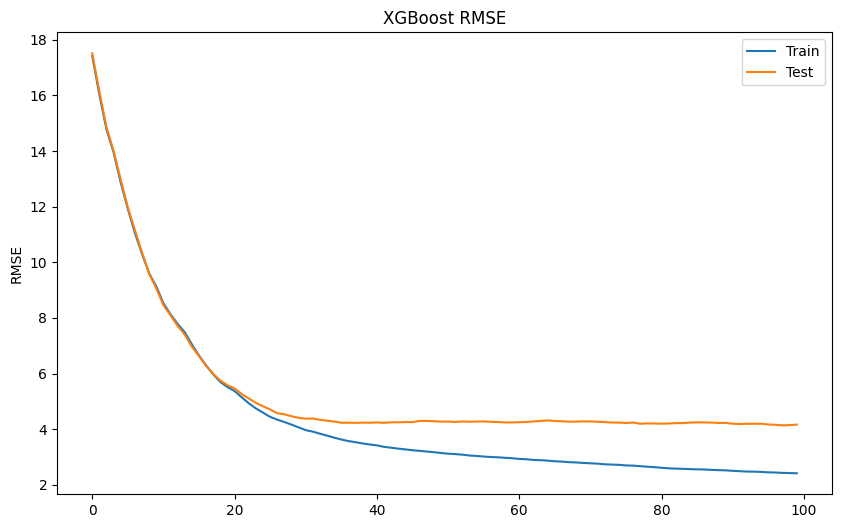

In [48]:
# Define the evaluation metric
eval_set = [(X_train, y_train), (X_test, y_test)]

# Re-train the model with evaluation metric logging
xgb_regressor.fit(X_train, y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

# Retrieve the training and evaluation results
results = xgb_regressor.evals_result()

# Plot the loss function
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()


In [47]:

# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test data
mse_test = mean_squared_error(y_test, y_pred)

# Print the MSE
print('MSE on Test Data:', mse_test)

MSE on Test Data: 17.325506002699246


###Comparizon Plot (Truth vs. Prediction)

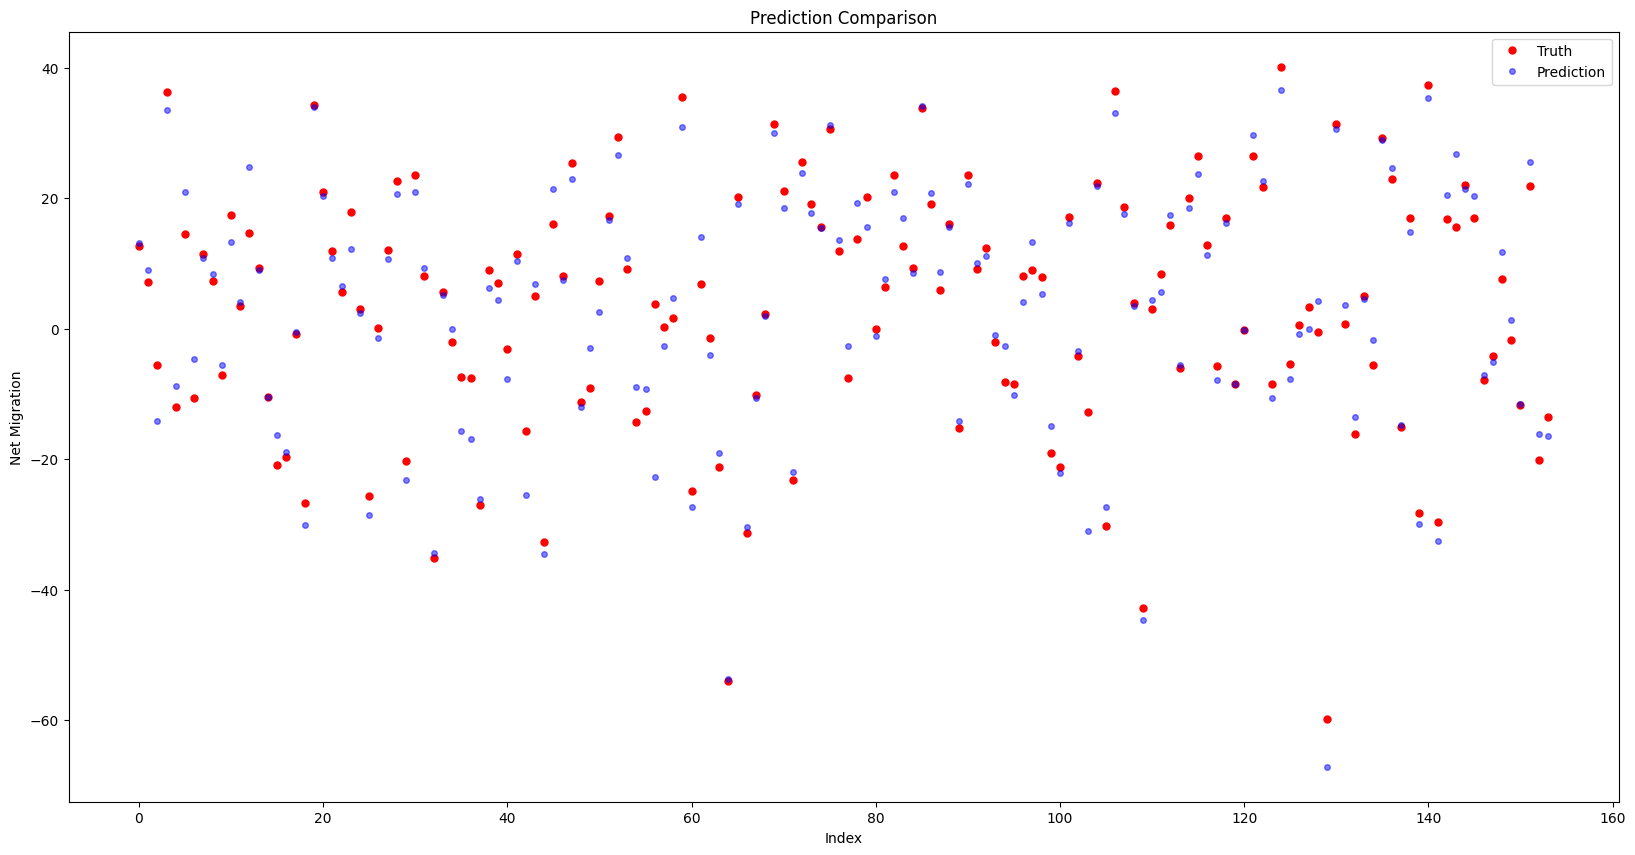

In [40]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
    fig, ax1 = plt.subplots()
    ax1.plot(x_val, truth, color="red", label="Truth", linestyle='None', marker="o", markersize=5)
    ax1.plot(x_val, pred, color="blue", label="Prediction", linestyle='None', marker="o", markersize=4, alpha=0.5)

    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    ax1.legend()
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.title('Prediction Comparison')
    plt.show()

# Use the function to plot the comparison
x_val = range(len(y_test))  # Assuming x_val is the range of the test set indices
plot_comparison(x_val, y_pred, y_test, xlab='Index', ylab='Net Migration')


###Scatter Plot (True vs. Prediction)

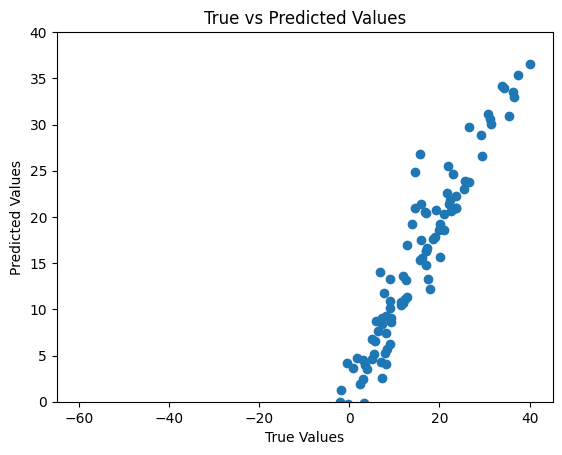

In [44]:
# Plotting the scatter plot of true vs predicted values directly
plt.scatter(y_test, y_pred)
plt.ylim(0, 40)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


### Prediction Error Percentage

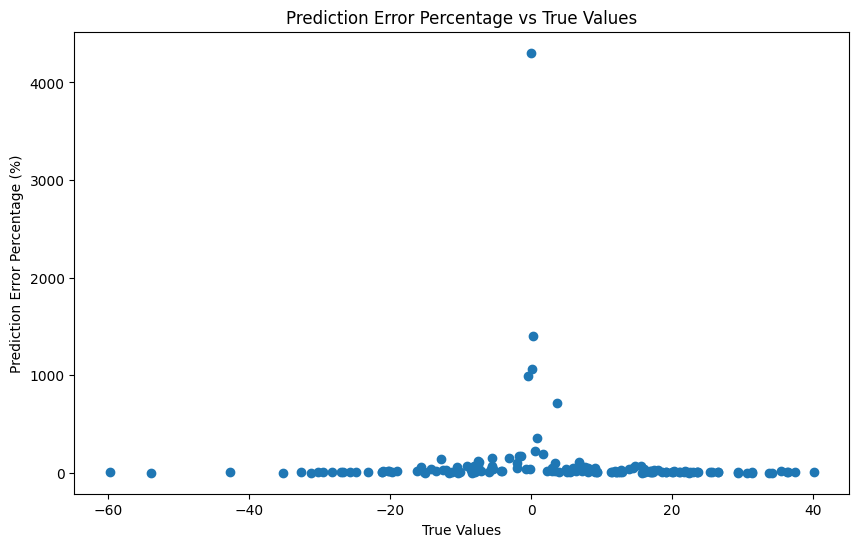

In [62]:
# Plot comparison of the prediction error percentage

def plot_error_percentage(y_test, y_pred):
    error_percentage = abs((y_test - y_pred) / y_test) * 100

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, error_percentage)
    plt.xlabel('True Values')
    plt.ylabel('Prediction Error Percentage (%)')
    plt.title('Prediction Error Percentage vs True Values')
    plt.show()

# Use the function to plot the error percentage
plot_error_percentage(y_test, y_pred)


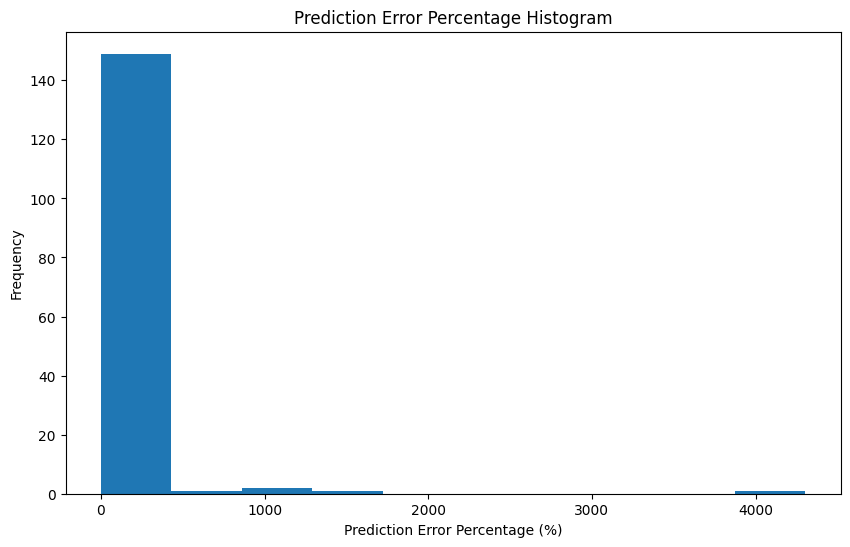

In [61]:
# Calculate the prediction error percentage
error_percentage = abs((y_test - y_pred) / y_test) * 100

# Plot the histogram of the prediction error percentage
plt.figure(figsize=(10, 6))
plt.hist(error_percentage, bins=10)
plt.xlabel('Prediction Error Percentage (%)')
plt.ylabel('Frequency')
plt.title('Prediction Error Percentage Histogram')
plt.show()


### Prediction Error Percentage (CHECK X_TEST INDEX)

In [ ]:
# Extract the specific feature (8th column, index 7)
NetMig_test = X_test[:, 7]
print(NetMig_test)

# Making predictions using the XGBoost model
y_pred = xgb_regressor.predict(X_test)

# Assuming y_test is not scaled, use it directly for the true values
y_truth = y_test

# Plot comparison
plot_comparison(NetMig_test, y_pred, y_truth, "Net Migration - True", "Net Migration - Predicted")

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [%]')
_ = plt.ylabel('Count')